### Import Libraries

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt

### Define Paths

In [14]:
research_dir = r"D:/school/research"
code_dir = os.path.join(research_dir, "code")
model_dir = os.path.join(code_dir, "explore_again", "models")
data_dir = os.path.join(research_dir, "data")
dhcp_rel2 = os.path.join(data_dir, "dhcp_rel2")
processed_dir = os.path.join(dhcp_rel2, "processed")
volume_dir = os.path.join(processed_dir, "volumes")
seg_dir = os.path.join(processed_dir, "segments")
seg_vol_dir = os.path.join(processed_dir, "volume_segments")
pred_dir = os.path.join(dhcp_rel2, "predictions")
seg_pred_dir = os.path.join(pred_dir, "vae_9seg")

l1_dir = os.path.join(volume_dir, "l1")
l5_dir = os.path.join(volume_dir, "l5")

l1_seg_dir = os.path.join(seg_dir, "l1")
l5_seg_dir = os.path.join(seg_dir, "l5")

l1_seg_vol_dir = os.path.join(seg_vol_dir, "l1")
l5_seg_vol_dir = os.path.join(seg_vol_dir, "l5")

l1_seg_pred_dir = os.path.join(seg_pred_dir, "l1")
l5_seg_pred_dir = os.path.join(seg_pred_dir, "l5")

slice_out = os.path.join(pred_dir, "vae_9seg_residuals")
train_out = os.path.join(slice_out, "train")
val_out = os.path.join(slice_out, "val")
test_out = os.path.join(slice_out, "test")

### Get/Generate Data

In [5]:
np.random.seed(42)
num_samples = int(len(os.listdir(l1_dir)) / 2)
samples = np.array([i for i in range(0, num_samples)])
np.random.shuffle(samples)

split_val = int(0.8 * num_samples)
train_indices = samples[0:split_val]
val_indices = samples[split_val:]

num_test = int(len(os.listdir(l5_dir)) / 2)
test_indices = np.array([i for i in range(0, num_test)])

In [64]:
def generate_residuals(seg_dir, pred_dir, indices, out_dir):
    seg_list = sorted([x for x in os.listdir(seg_dir)])
    pred_list = sorted([x for x in os.listdir(pred_dir)])
    file_list = [y for x,y in enumerate(zip(seg_list, pred_list)) if x in indices]
    
    for idx, data in enumerate(file_list):
        seg_file, pred_file = data
        seg_path = os.path.join(seg_dir, seg_file)
        seg = np.load(seg_path)
        
        pred_path = os.path.join(pred_dir, pred_file)
        pred = np.load(pred_path)
        
        file_stub = seg_file.split("seg_T2w.npy")[0]
        for i in range(0, 256):
            seg_slice = seg[:,:,:,i]
            residual = seg_slice - pred[:,:,:,i]
            
            out_path = os.path.join(out_dir, f"{file_stub}slice{i}_residual.npy")
            np.save(out_path, residual)
            
            seg_out = os.path.join(out_dir, f"{file_stub}slice{i}_og.npy")
            np.save(seg_out, seg_slice)
            
            
        print(f"Finished processing {idx}")

In [65]:
%%time

# train
generate_residuals(l1_seg_vol_dir, l1_seg_pred_dir, train_indices, train_out)

Finished processing 0
Finished processing 1
Finished processing 2
Finished processing 3
Finished processing 4
Finished processing 5
Finished processing 6
Finished processing 7
Finished processing 8
Finished processing 9
Finished processing 10
Finished processing 11
Finished processing 12
Finished processing 13
Finished processing 14
Finished processing 15
Finished processing 16
Finished processing 17
Finished processing 18
Finished processing 19
Finished processing 20
Finished processing 21
Finished processing 22
Finished processing 23
Finished processing 24
Finished processing 25
Finished processing 26
Finished processing 27
Finished processing 28
Finished processing 29
Finished processing 30
Finished processing 31
Finished processing 32
Finished processing 33
Finished processing 34
Finished processing 35
Finished processing 36
Finished processing 37
Finished processing 38
Finished processing 39
Finished processing 40
Finished processing 41
Finished processing 42
Finished processing 4

In [66]:
%%time

# val
generate_residuals(l1_seg_vol_dir, l1_seg_pred_dir, val_indices, val_out)

Finished processing 0
Finished processing 1
Finished processing 2
Finished processing 3
Finished processing 4
Finished processing 5
Finished processing 6
Finished processing 7
Finished processing 8
Finished processing 9
Finished processing 10
Finished processing 11
Finished processing 12
Finished processing 13
Finished processing 14
Finished processing 15
Finished processing 16
Finished processing 17
Finished processing 18
Finished processing 19
Finished processing 20
Finished processing 21
Finished processing 22
Finished processing 23
Finished processing 24
Finished processing 25
Finished processing 26
Finished processing 27
Finished processing 28
Finished processing 29
Finished processing 30
Finished processing 31
Finished processing 32
Finished processing 33
Finished processing 34
Finished processing 35
Finished processing 36
Finished processing 37
Finished processing 38
Finished processing 39
Finished processing 40
Finished processing 41
CPU times: total: 4min 49s
Wall time: 5min 2

In [67]:
%%time

# test
generate_residuals(l5_seg_vol_dir, l5_seg_pred_dir, test_indices, test_out)

Finished processing 0
Finished processing 1
Finished processing 2
Finished processing 3
Finished processing 4
Finished processing 5
Finished processing 6
Finished processing 7
Finished processing 8
Finished processing 9
Finished processing 10
Finished processing 11
Finished processing 12
Finished processing 13
Finished processing 14
Finished processing 15
Finished processing 16
Finished processing 17
Finished processing 18
Finished processing 19
Finished processing 20
Finished processing 21
Finished processing 22
Finished processing 23
Finished processing 24
Finished processing 25
Finished processing 26
CPU times: total: 3min 6s
Wall time: 3min 29s


In [58]:
test = np.load(r"D:\school\research\data\dhcp_rel2\predictions\vae_9seg_residuals\train\sub-CC00062XX05_13801_residual_slice128.npy")
test2 = np.load(r"D:\school\research\data\dhcp_rel2\predictions\vae_9seg_residuals\train\sub-CC00062XX05_13801_og_slice128.npy")

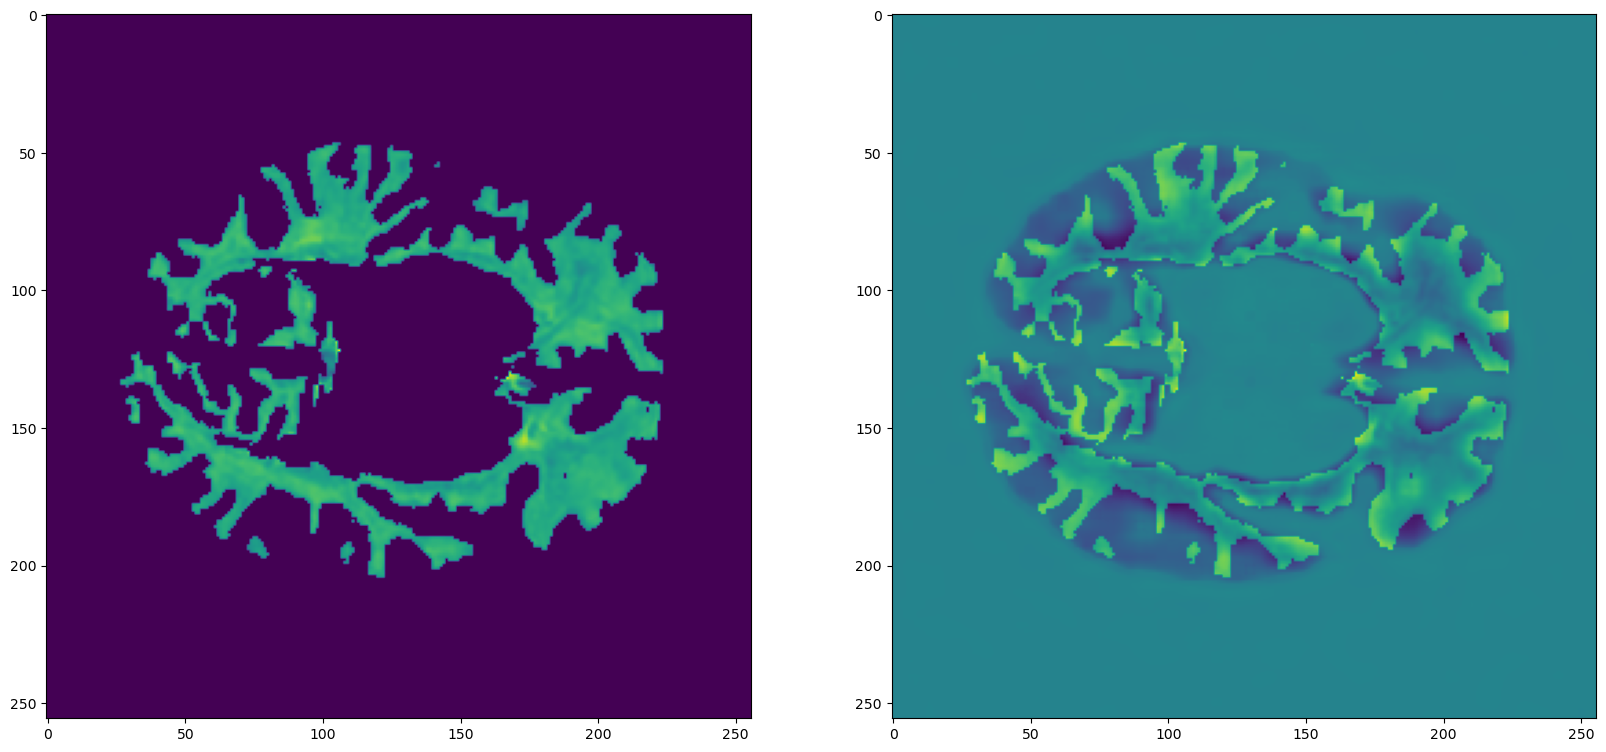

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(test2[2])
ax[1].imshow(test[2])

In [ ]:
train = Data3DResidual(l1_seg_vol_dir, l1_seg_pred_dir, train_indices)
val = Data3DResidual(l1_seg_vol_dir, l1_seg_pred_dir, val_indices)
test = Data3DResidual(l5_seg_vol_dir, l5_seg_pred_dir, test_indices)
*-